# Analiza Success Rate projektów z kickstartera

## Cel: Przygotowanie atrybutów z DF pod aplikację mającą pomóc w wyborze determinantów gwarantującycg sukces projektu

In [1]:
#import bibliotek
import ipywidgets as widgets
from IPython.display import display
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#wczytywanie DF z linku https://we.tl/t-yDSAPEXRdB

DF = pd.read_csv('kickstarter_filtered.tsv',sep='\t')
DF.head()

#zmiana czcionki  na wykresach
plt.rcParams.update({'font.size': 16})

In [3]:
DF.columns

Index(['id', 'name', 'main_category', 'category', 'country', 'launched',
       'deadline', 'duration', 'currency', 'goal_in_defined_currency',
       'pledged_in_defined_currency', 'goal_in_usd', 'pledged_in_usd',
       'percentage_of_money_collected', 'backers', 'state'],
      dtype='object')

## Histogram głównych kategorii

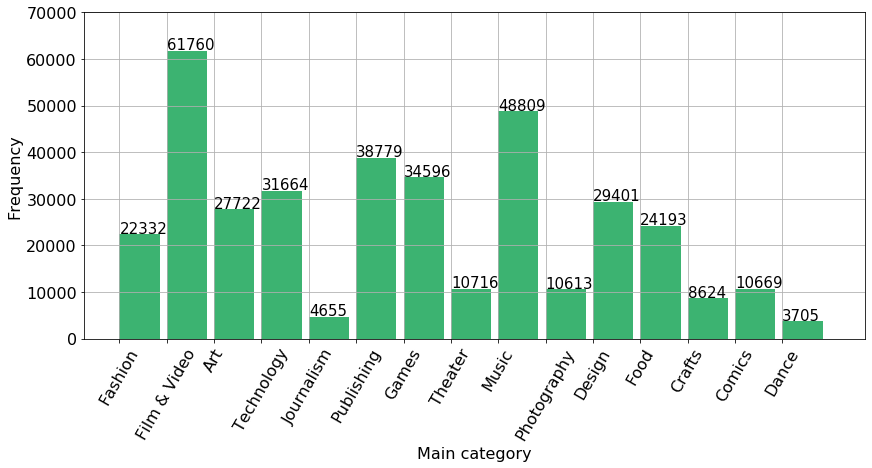

In [4]:
plt.figure(figsize=(14, 6))

label = plt.hist(DF['main_category'].to_numpy(), 
         bins=(np.arange(16) - 0.5 ),
         histtype='bar', 
         align='right', 
         orientation='vertical',
         color='mediumseagreen',
         width=0.85)
plt.ylabel('Frequency')
plt.xlabel('Main category')
plt.xticks(range(15),rotation=60)
plt.ylim(top=70000)
plt.grid(True)

for i in range(len(label[0])):
    plt.text(x = i , y=(label[0][i]+300) ,s = int(label[0][i]), size = 15)

plt.show()

## Współczynnik sukcesu ze względu na kategorie główną

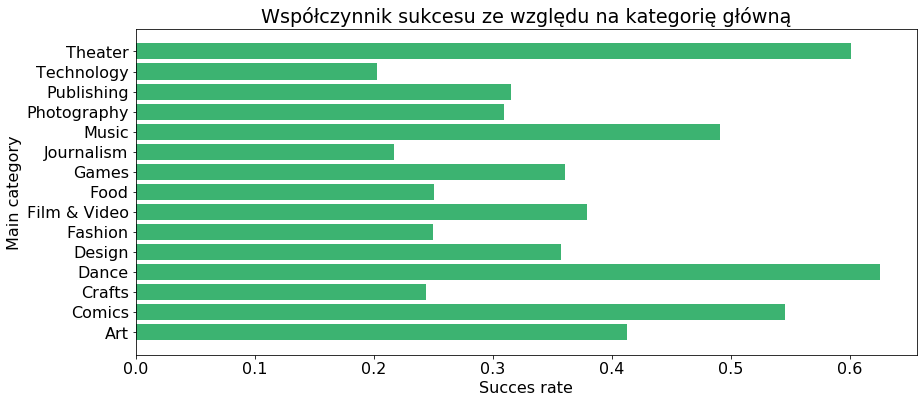

In [5]:
#grupujemy wartości na podstawie kategorii głównej
currency_state=DF.groupby('main_category')['state'].value_counts().unstack().fillna(0)

succes_rate={}
good=0
bad=0
unique_currency=currency_state.index

#dla każdego kraju wyliczamy succes_rate='successful'/'all'
for currency in unique_currency:
    good=currency_state.at[currency,'successful']
    bad=currency_state.at[currency,'failed']+currency_state.at[currency,'canceled']
    all_results=good+bad
    succes_rate[currency]=good/all_results

#przygotowujemy wartości x,y do pokazania na wykresie
x = list(succes_rate.keys())
y = list(succes_rate.values())

#tworzymy wykres
fig, ax = plt.subplots(figsize=(14, 6))
ax.barh(x, y, color='mediumseagreen')
ax.set_xlabel('Succes rate')
ax.set_ylabel('Main category')
ax.set_title('Współczynnik sukcesu ze względu na kategorię główną')
plt.show()

### Wnioski:
1. 15 kategorii
2. najwęcej projektów w kategorii Film & Video
3. najmniej projektów w kategorii Dance

## Histogram głównych kategorii połączonych z podkategoriami

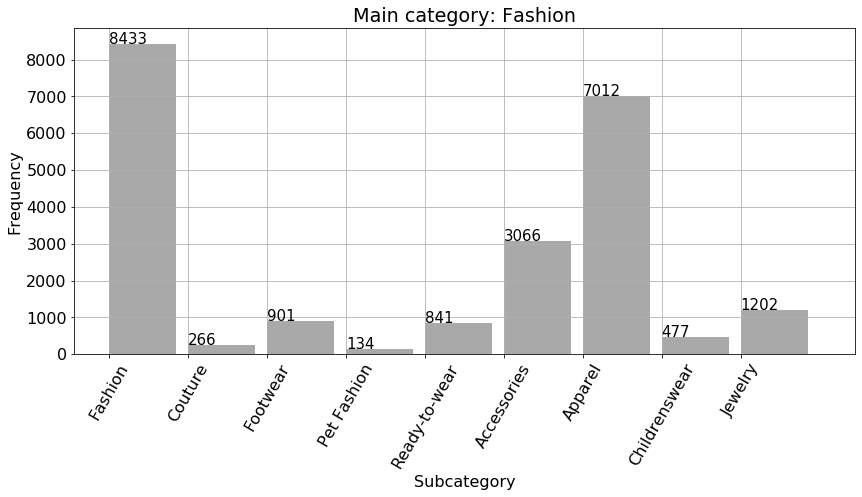

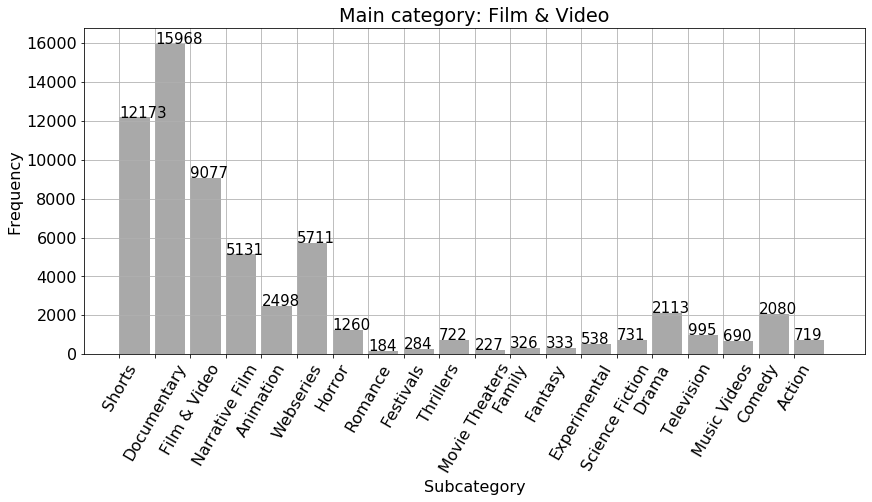

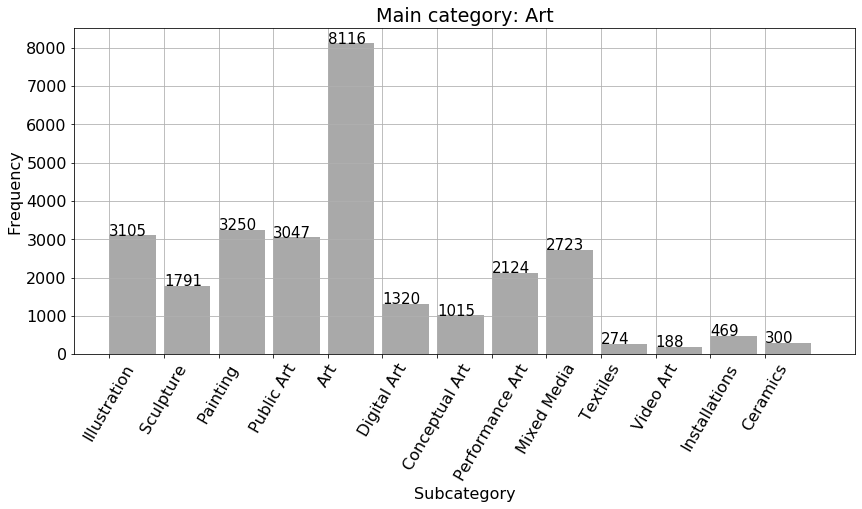

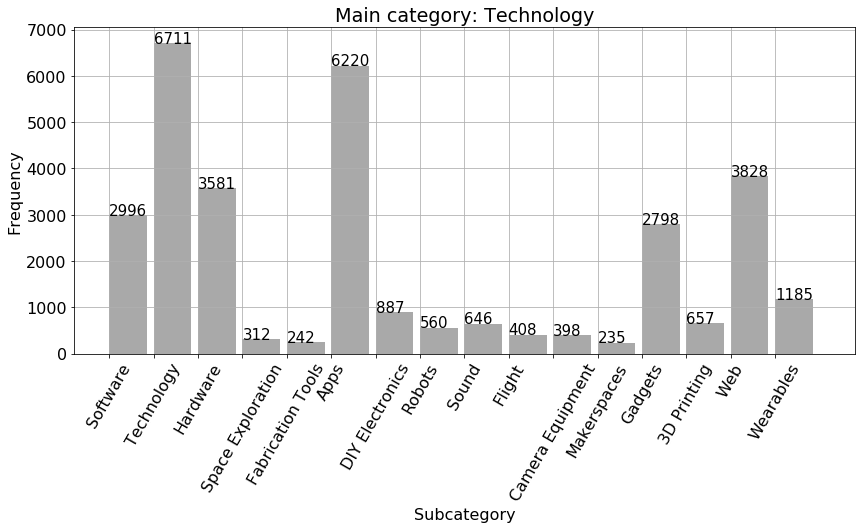

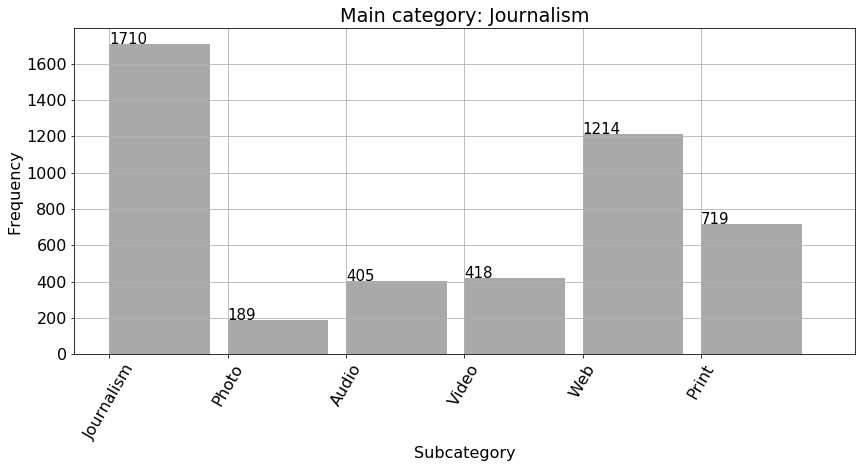

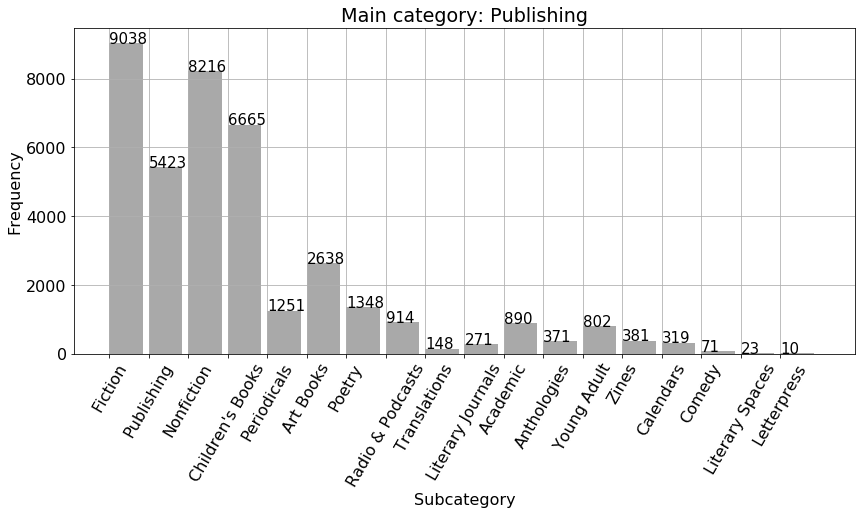

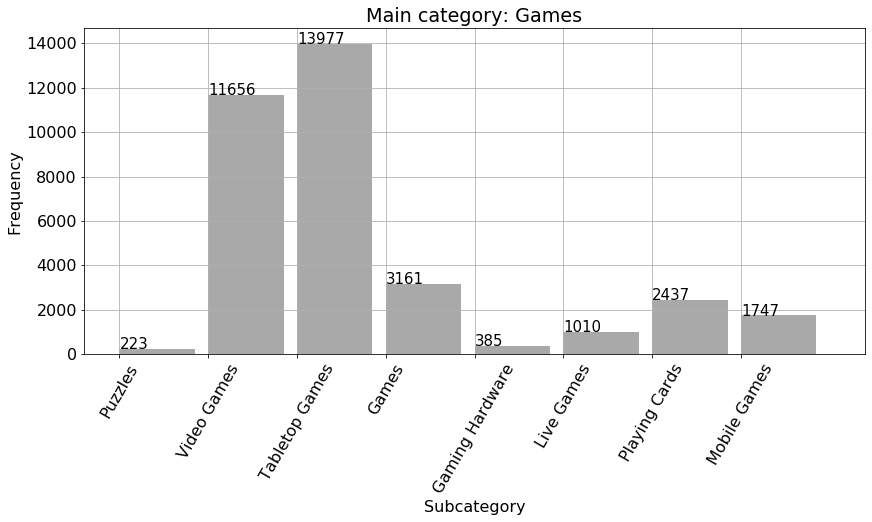

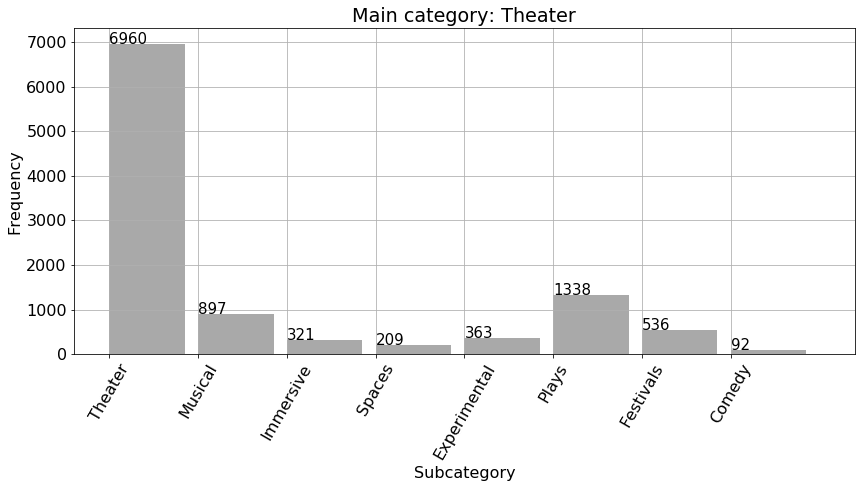

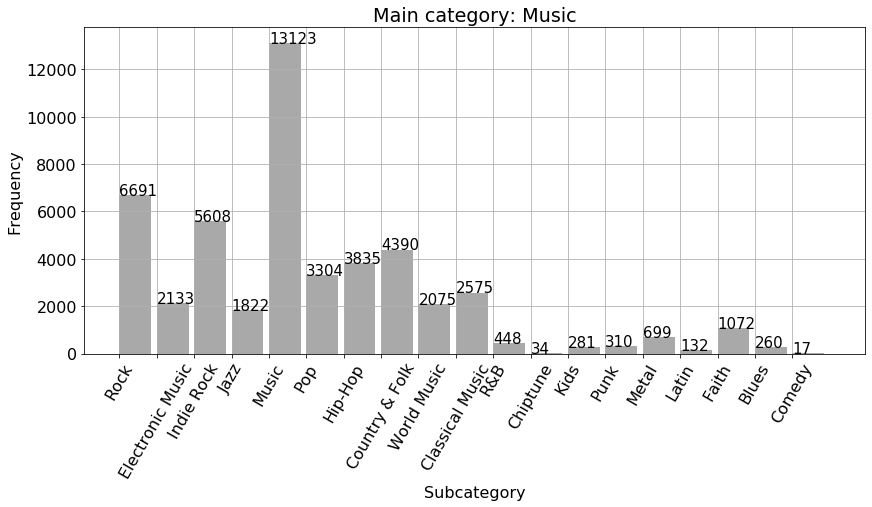

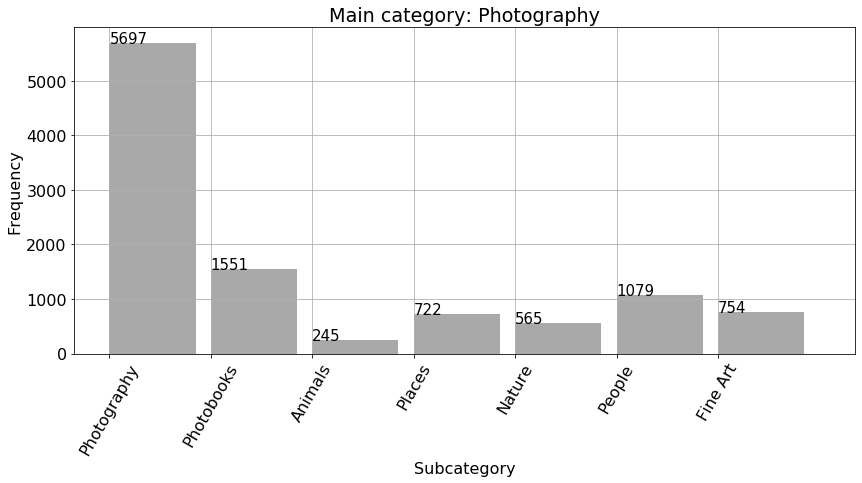

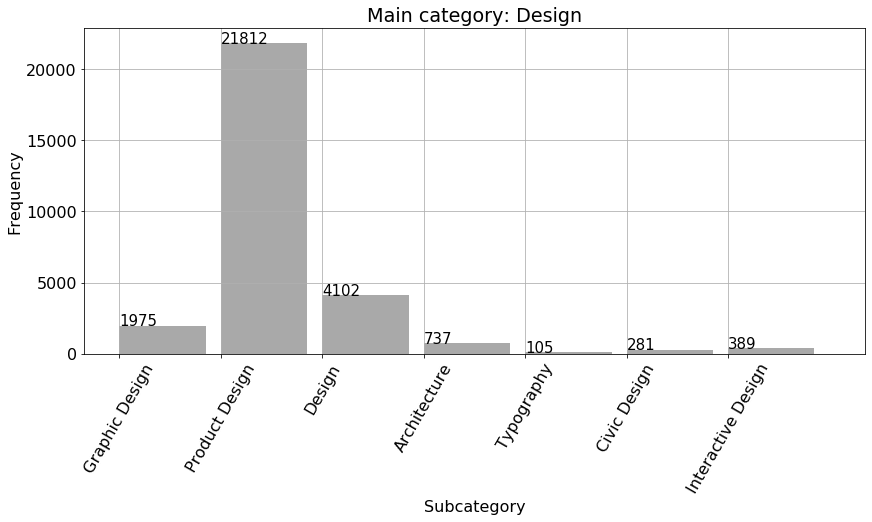

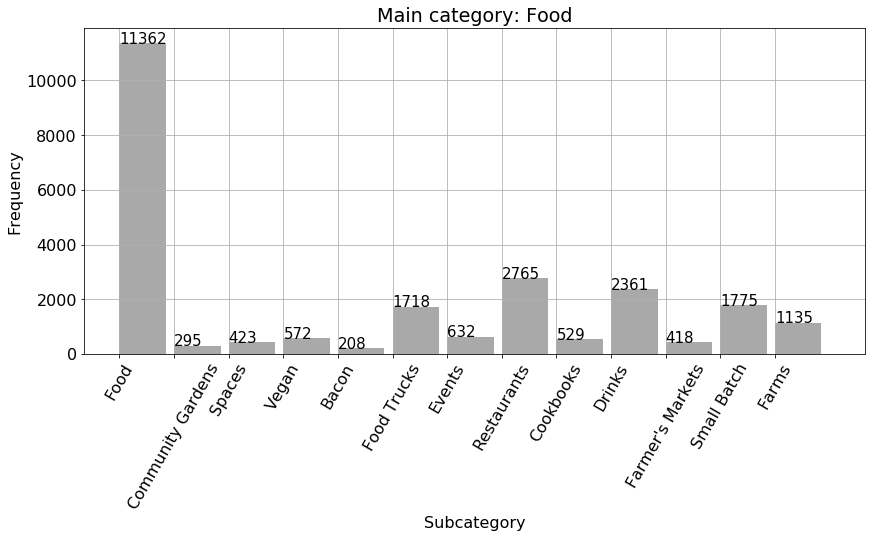

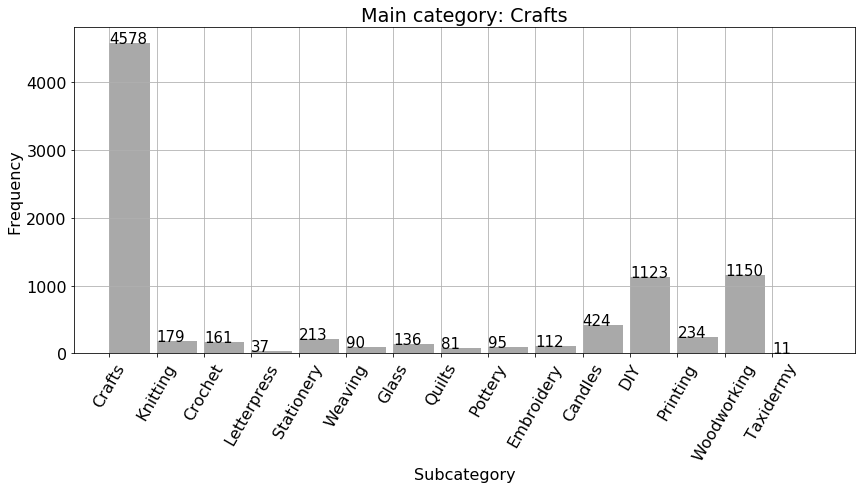

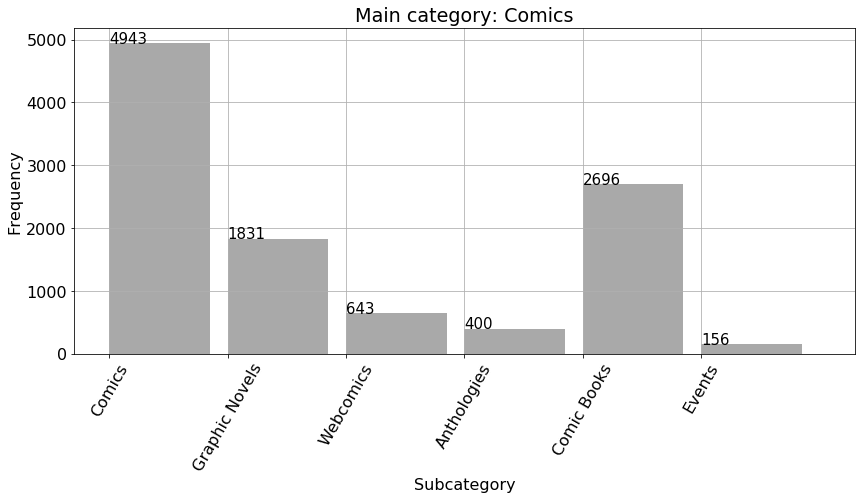

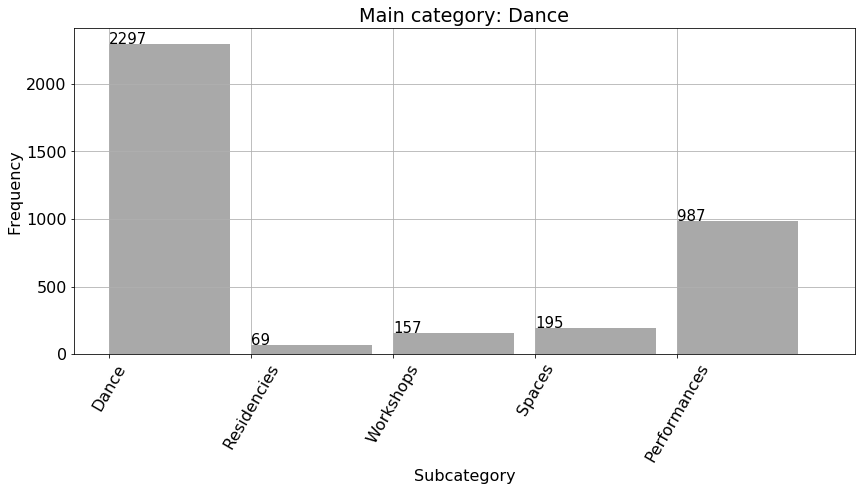

In [6]:
main_category_list=pd.unique(DF['main_category'])

for main_category in main_category_list:
   
    plt.figure(figsize=(14, 6))
    category_list=pd.unique(DF['category'][DF['main_category']==main_category])
    ticks=len(category_list)
    label = plt.hist((DF['category'][DF['main_category']==main_category]).to_numpy(), 
             bins=(np.arange(ticks+1) - 0.5 ),
             histtype='bar', 
             align='right', 
             orientation='vertical',
             color='darkgrey',
             width=0.85)
    plt.ylabel('Frequency')
    plt.xlabel('Subcategory')
    plt.xticks(range(ticks),rotation=60)
    plt.title('Main category: '+main_category)
    plt.grid(True)

    for i in range(len(label[0])):
        plt.text(x = i , y=(label[0][i]) ,s = int(label[0][i]), size = 15)

    plt.show()

## Współczynnik sukcesu ze względu na kategorię i podkategorię

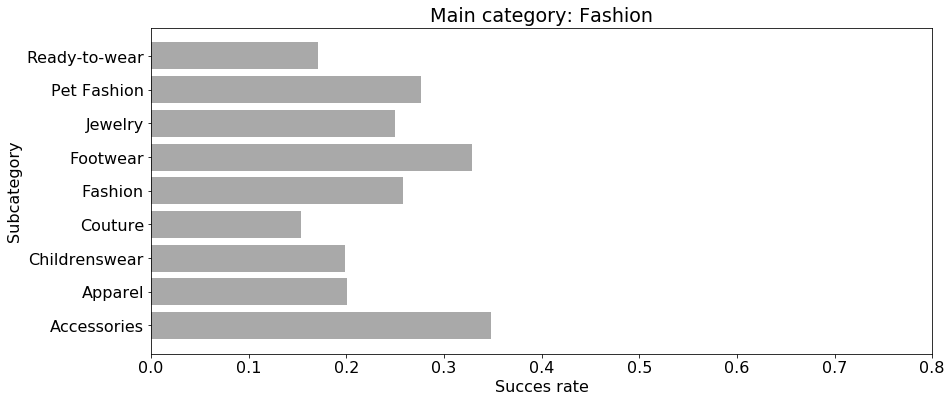

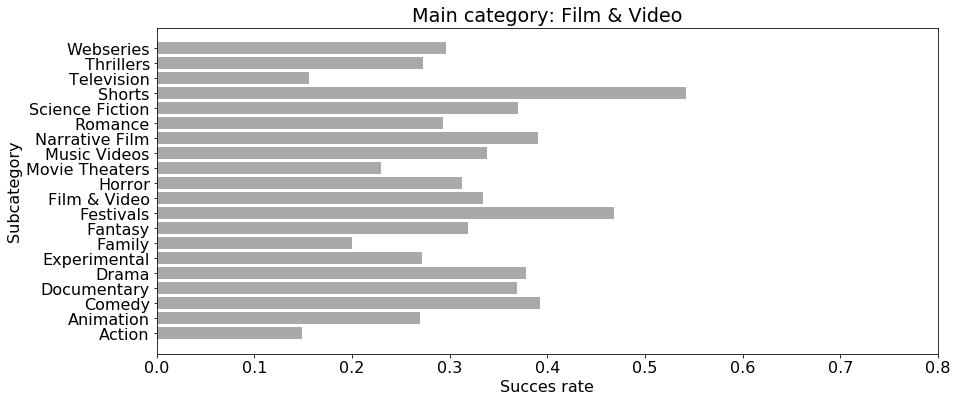

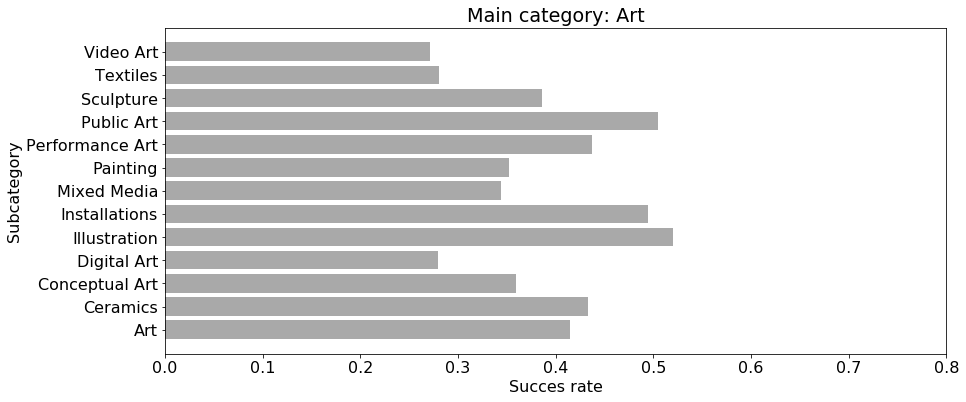

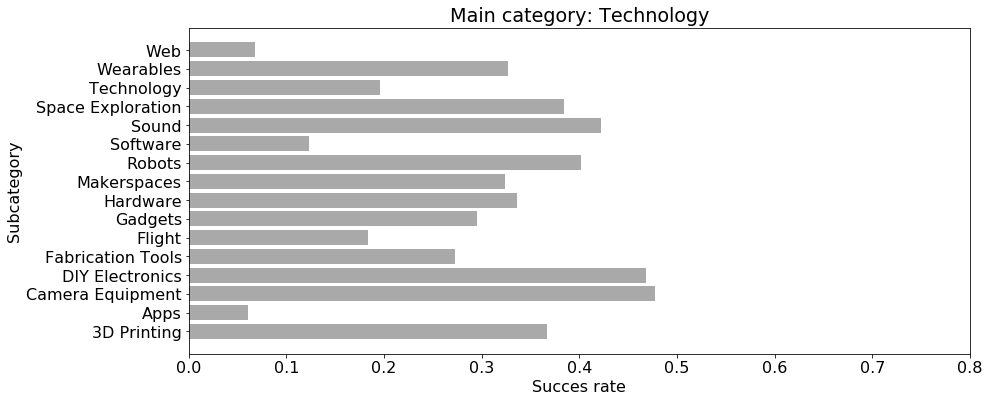

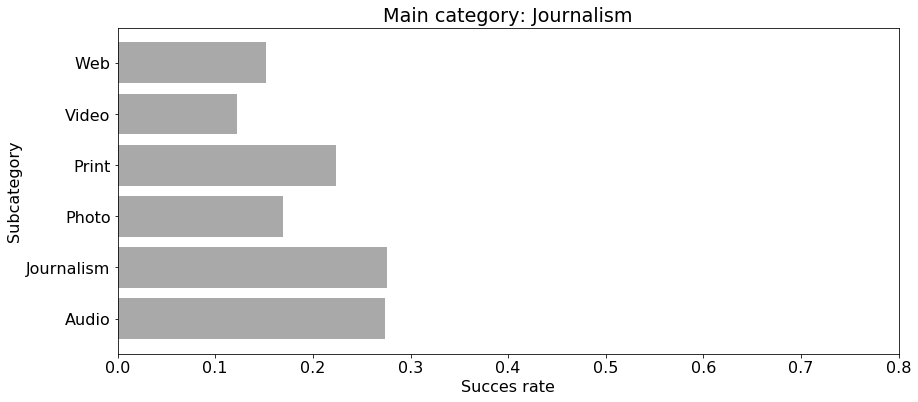

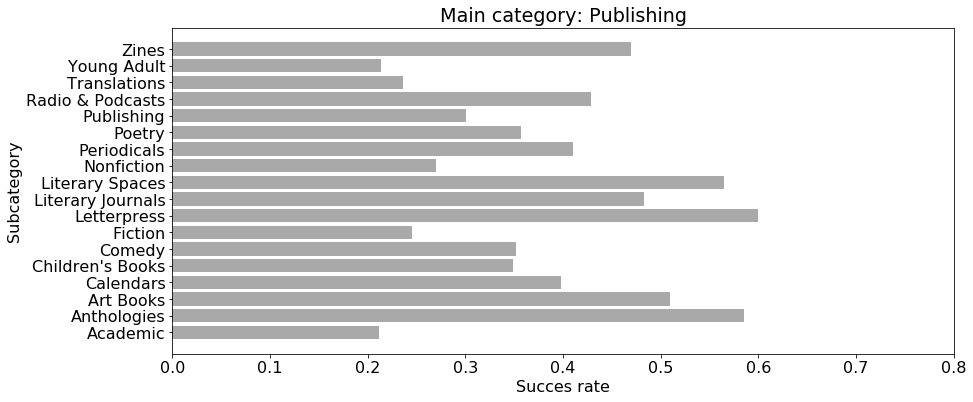

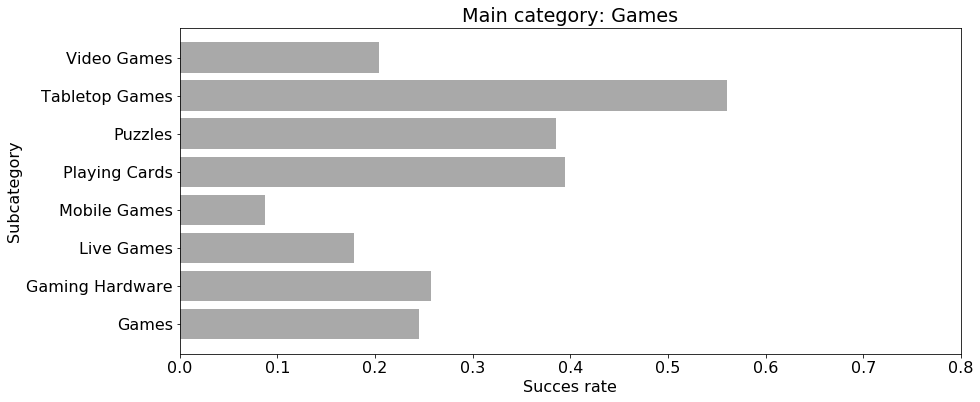

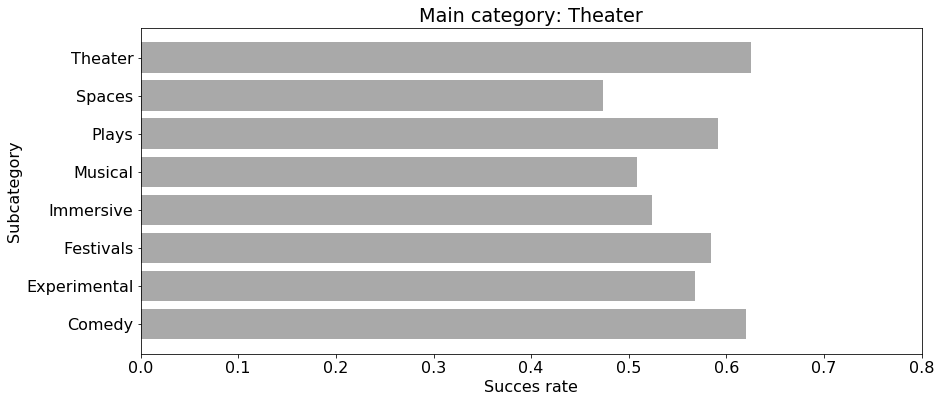

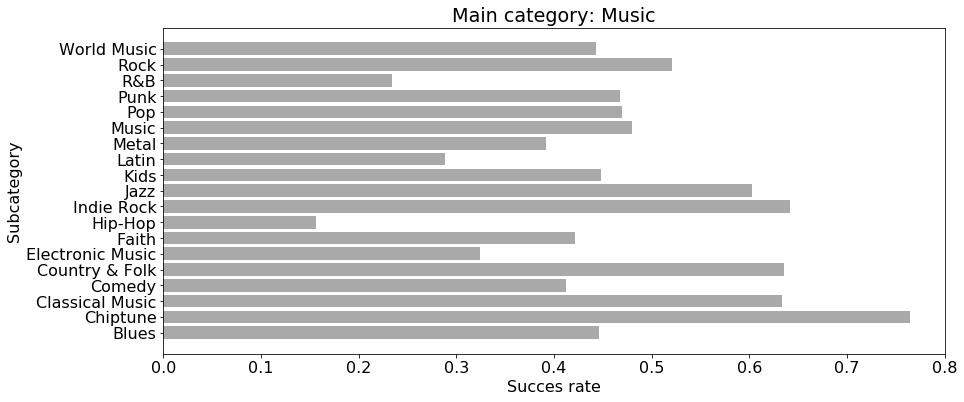

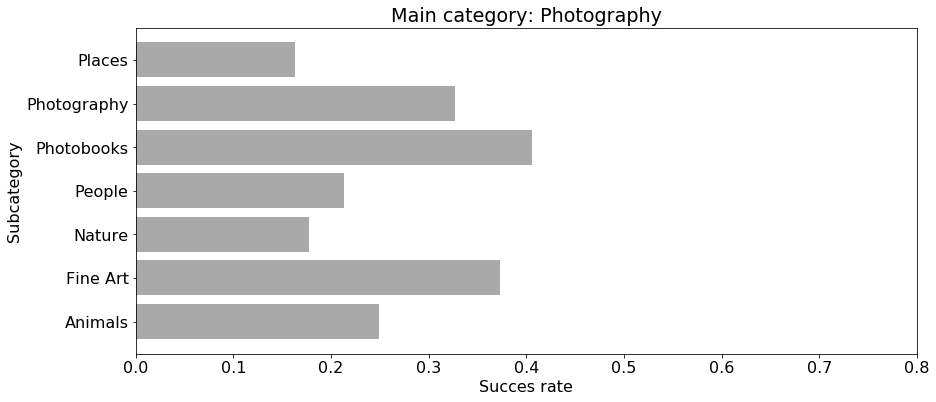

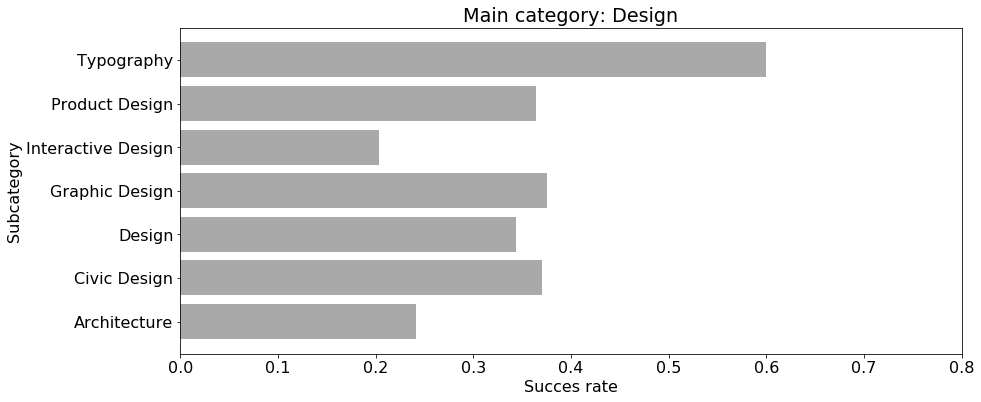

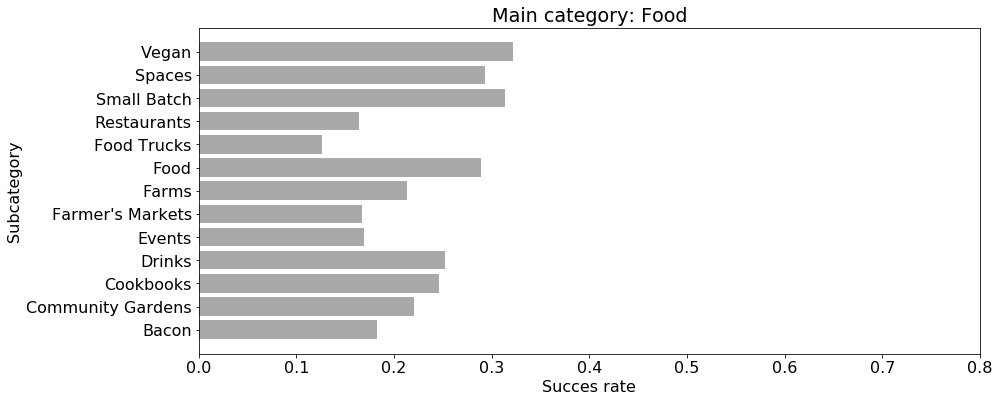

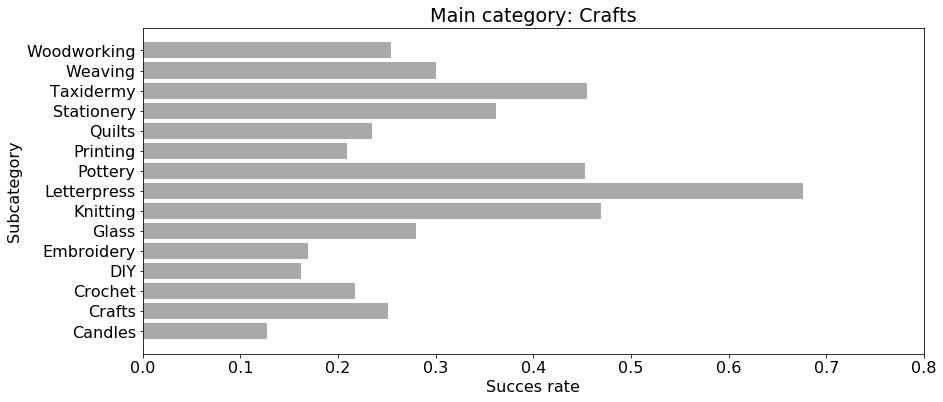

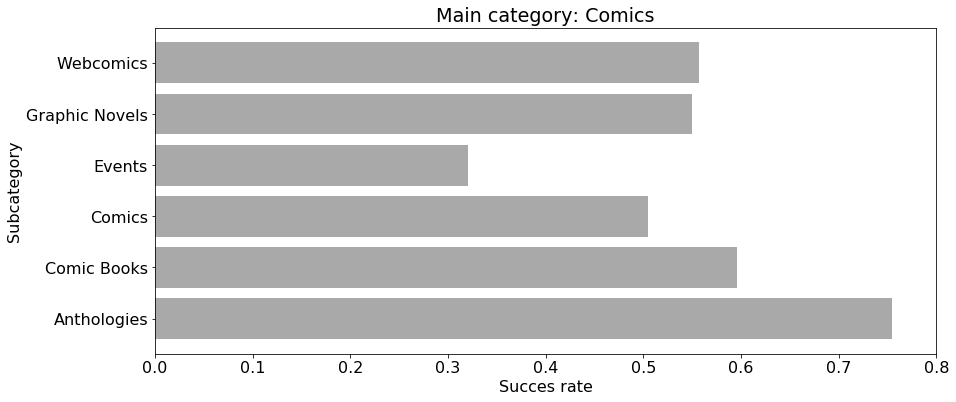

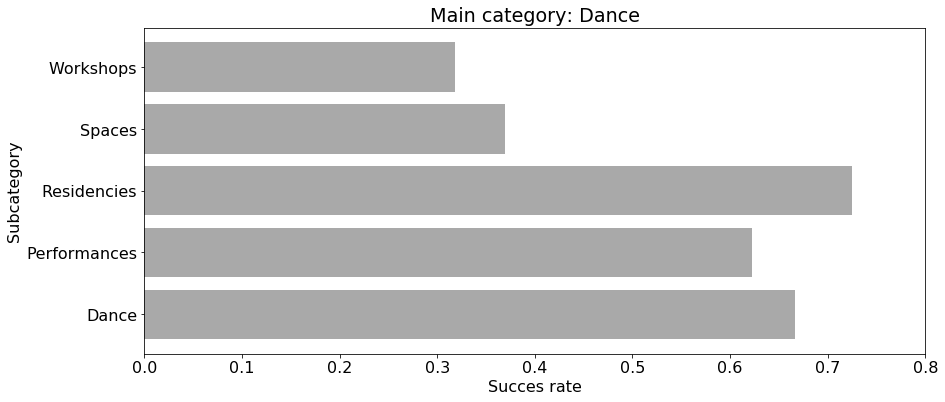

In [7]:
#grupujemy wartości na podstawie kategorii głównej i podkategorii
category_state=DF.groupby(['main_category','category'])['state'].value_counts().unstack().fillna(0)
succes_rate={}
good=0
bad=0
unique_category=category_state.index

#dla każdego kraju wyliczamy succes_rate='successful'/'all'
for category in unique_category:
    good=category_state.at[category,'successful']
    bad=category_state.at[category,'failed']+category_state.at[category,'canceled']
    all_results=good+bad
    succes_rate[category]=good/all_results

# #przygotowujemy wartości x,y do pokazania na wykresie
x = list(succes_rate.keys())
y = list(succes_rate.values())

for main_category in main_category_list:
    new_x=[]
    new_y=[]
    for i in range(len(x)):
        if x[i][0]==main_category:
            new_x.append(x[i][1])
            new_y.append(y[i])   
    # #tworzymy wykres
    fig, ax = plt.subplots(figsize=(14, 6))
    ax.barh(new_x, new_y,color='darkgrey')
    ax.set_xlabel('Succes rate')
    ax.set_xlim(0,0.8)
    ax.set_ylabel('Subcategory')
    ax.set_title('Main category: '+main_category)
    plt.show()

### Wnioski:
1. ??? coś nie tak

## Histogram krajów

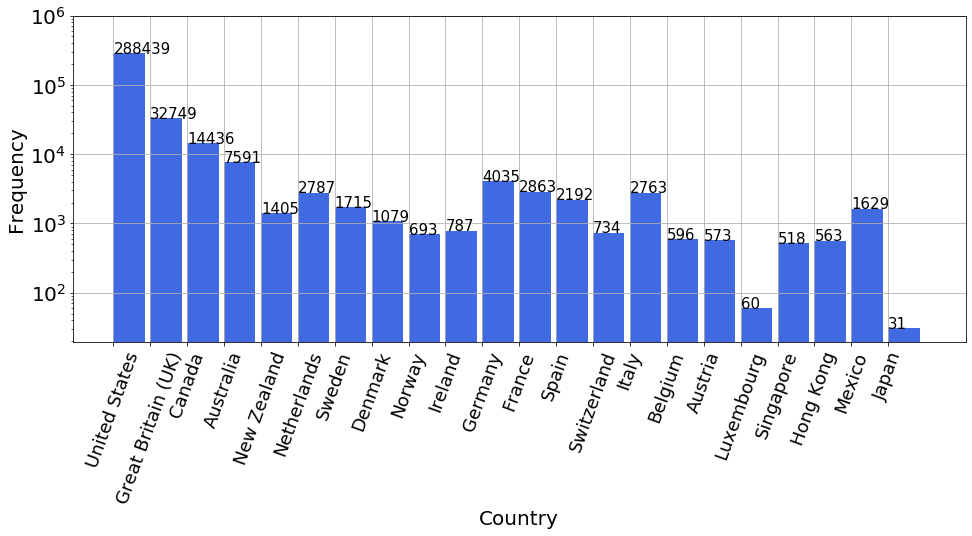

In [8]:
plt.figure(figsize=(16, 6))

label = plt.hist(DF['country'].to_numpy(), 
         bins=(np.arange(23) - 0.5 ),
         histtype='bar', 
         align='right', 
         orientation='vertical',
         color='royalblue',
         width=0.85)
plt.ylabel('Frequency',fontsize=20)
plt.xlabel('Country',fontsize=20)
plt.xticks(range(22),rotation=70,fontsize=18)
plt.yticks(fontsize=20)
plt.grid(True)
plt.yscale('log')
plt.ylim(top=10e05)

for i in range(len(label[0])):
    plt.text(x = i , y=(label[0][i]) ,s = int(label[0][i]), size = 15)

plt.show()

## Współczynnik sukcesu ze względu na kraj

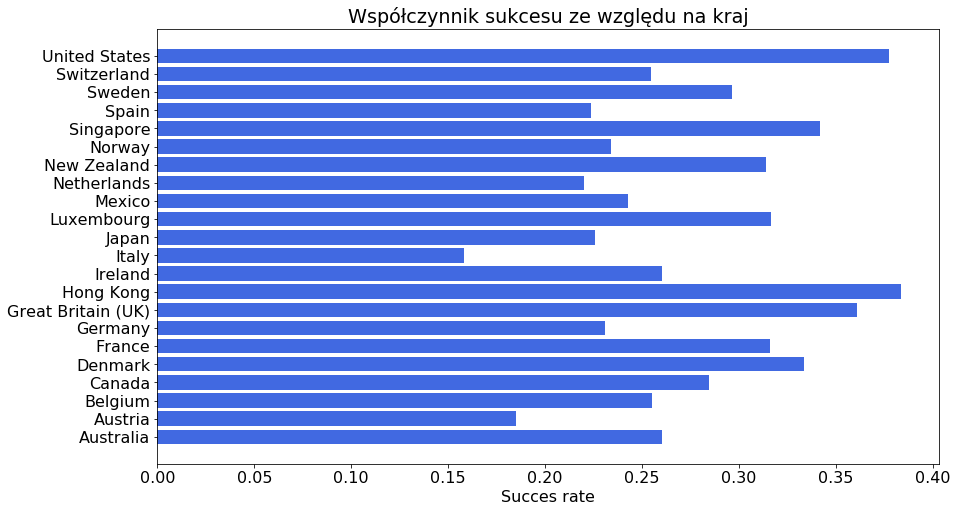

In [9]:
country_state=DF.groupby('country')['state'].value_counts().unstack().fillna(0)

succes_rate={}
good=0
bad=0
unique_country=country_state.index

for country in unique_country:
    good=country_state.at[country,'successful']
    bad=country_state.at[country,'failed']+country_state.at[country,'canceled']
    all_results=good+bad
    succes_rate[country]=good/all_results

x = list(succes_rate.keys())
y = list(succes_rate.values())

fig, ax = plt.subplots(figsize=(14, 8))
ax.barh(x, y, color='royalblue')
ax.set_xlabel('Succes rate')
ax.set_title('Współczynnik sukcesu ze względu na kraj')
plt.show()

### Wnioski:

## Histogram czasu trwania kampanii

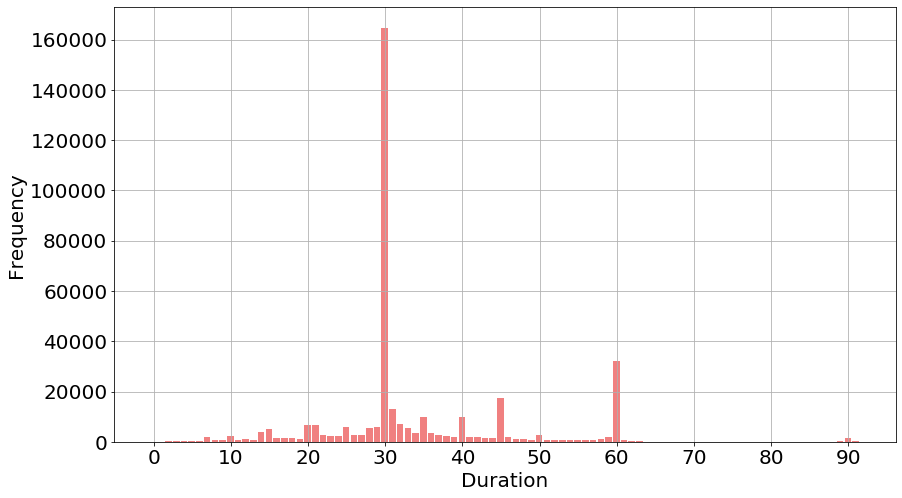

In [10]:
plt.figure(figsize=(14, 8))
 
label = plt.hist(DF['duration'].to_numpy(), 
         bins=(np.arange(93) - 0.5 ),
         histtype='bar', 
         align='mid', 
         orientation='vertical',
         color='lightcoral',
         width=0.85)
plt.ylabel('Frequency',fontsize=20)
plt.xlabel('Duration',fontsize=20)
plt.xticks([0,10,20,30,40,50,60,70,80,90],fontsize=20)
plt.yticks(fontsize=20)
plt.grid(True)
           
plt.show()

## Współczynnik sukcesu wyliczony na podstawie długości trwania kampanii

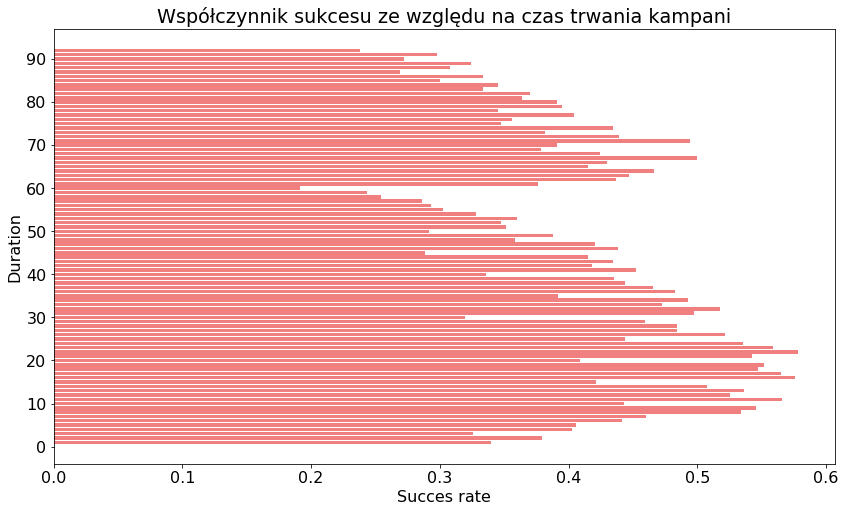

In [11]:
duration_state=DF.groupby('duration')['state'].value_counts().unstack().fillna(0)

succes_rate={}
good=0
bad=0
unique_duration=duration_state.index

for duration in unique_duration:
    good=duration_state.at[duration,'successful']
    bad=duration_state.at[duration,'failed']+duration_state.at[duration,'canceled']
    all_results=good+bad
    succes_rate[duration]=good/all_results

x = list(succes_rate.keys())
y = list(succes_rate.values())

fig, ax = plt.subplots(figsize=(14, 8))
ax.barh(x, y, color='lightcoral')
ax.set_xlabel('Succes rate')
ax.set_ylabel('Duration')
ax.set_yticks([0,10,20,30,40,50,60,70,80,90])
ax.set_title('Współczynnik sukcesu ze względu na czas trwania kampani')
plt.show()

### Wnioski:

## Histogram założonego celu

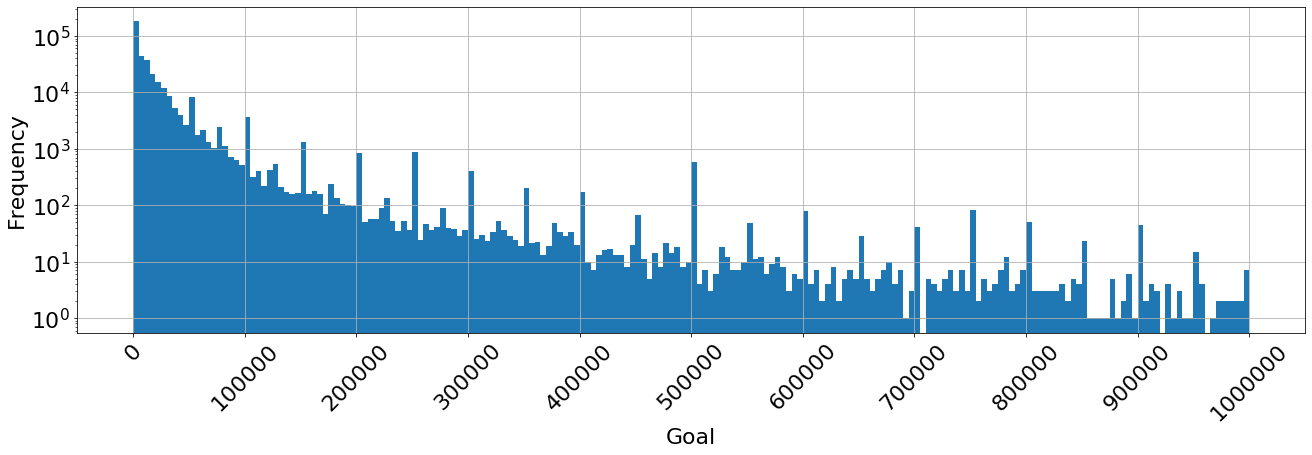

In [12]:
plt.figure(figsize=(22, 6))
my_hist=DF['goal_in_usd'][(DF['goal_in_usd'])<1000000].hist(bins=200)
my_hist.set_yscale('log')
plt.ylabel('Frequency',fontsize=22)
plt.xlabel('Goal',fontsize=22)
plt.yticks(fontsize=22)
plt.xticks([0,100000,200000,300000,400000,500000,600000,700000,800000,900000,1000000],
           fontsize=22,rotation=45 )
plt.show()


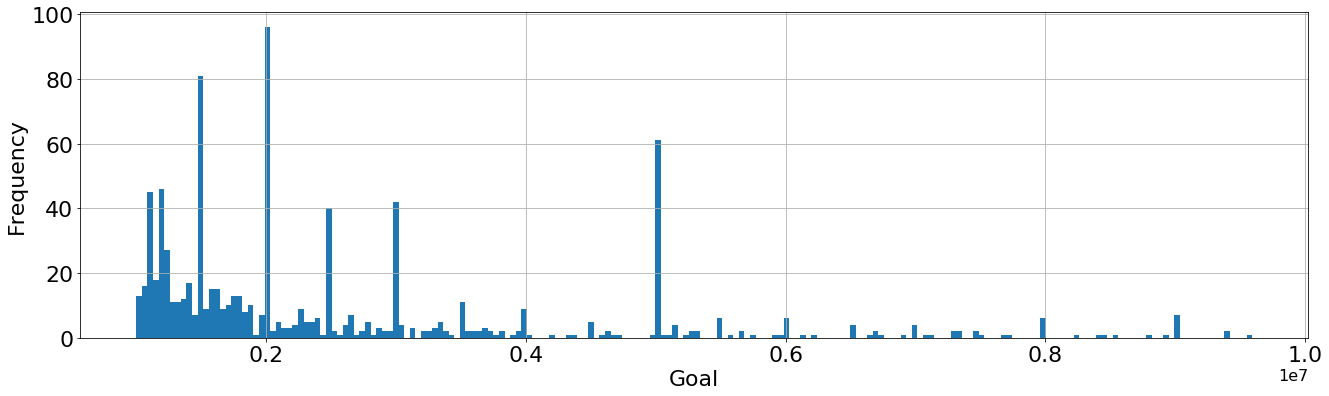

In [13]:
plt.figure(figsize=(22, 6))
my_hist=DF['goal_in_usd'][(DF['goal_in_usd']>1000000) & (DF['goal_in_usd']<10000000)].hist(bins=200)
#my_hist.set_yscale('log')
plt.ylabel('Frequency',fontsize=22)
plt.xlabel('Goal',fontsize=22)
plt.yticks(fontsize=22)
plt.xticks(fontsize=22)
plt.show()

### Wnioski:

## Współczynnik sukcesu ze względu na walutę

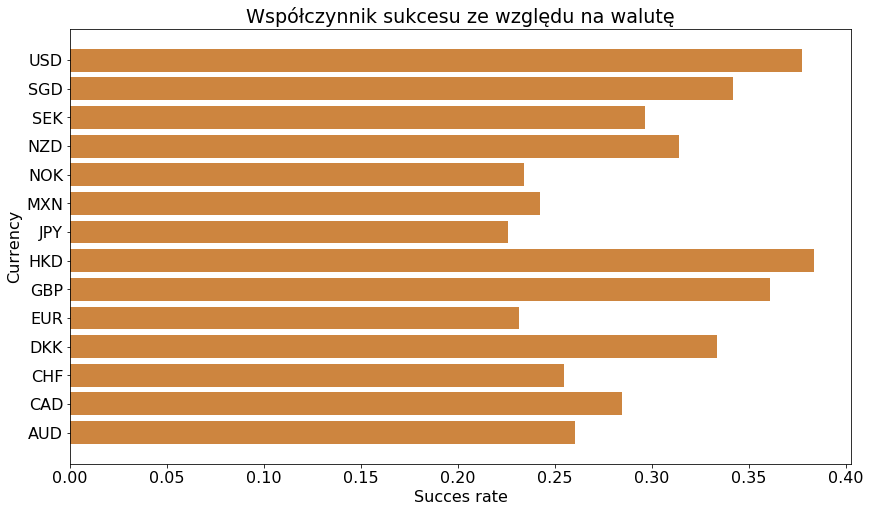

In [14]:
#grupujemy wartości na podstawie state
currency_state=DF.groupby('currency')['state'].value_counts().unstack().fillna(0)

succes_rate={}
good=0
bad=0
unique_currency=currency_state.index

#dla każdego kraju wyliczamy succes_rate='successful'/'all'
for currency in unique_currency:
    good=currency_state.at[currency,'successful']
    bad=currency_state.at[currency,'failed']+currency_state.at[currency,'canceled']
    all_results=good+bad
    succes_rate[currency]=good/all_results

#przygotowujemy wartości x,y do pokazania na wykresie
x = list(succes_rate.keys())
y = list(succes_rate.values())

#tworzymy wykres
fig, ax = plt.subplots(figsize=(14, 8))
ax.barh(x, y, color='peru')
ax.set_xlabel('Succes rate')
ax.set_ylabel('Currency')
ax.set_title('Współczynnik sukcesu ze względu na walutę')
plt.show()

### Wnioski:

## Współczynnik sukcesu dla krajów, w których walutą jest euro

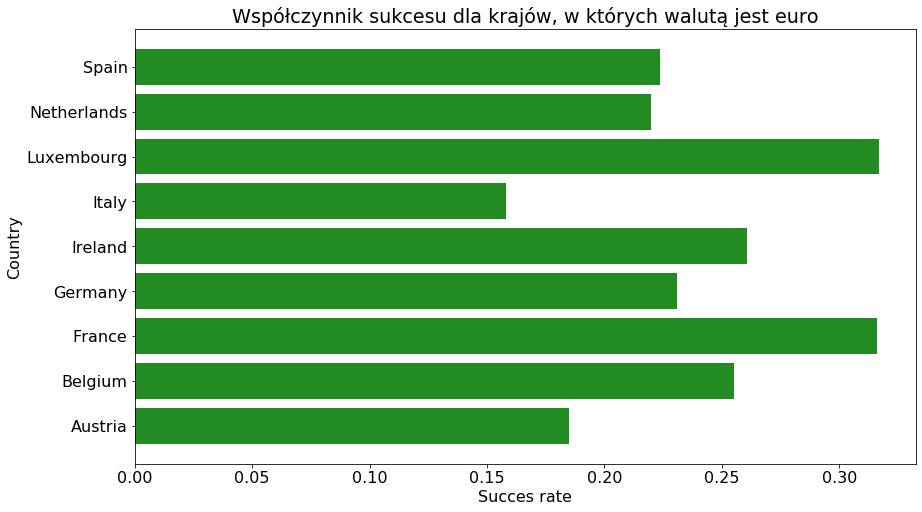

In [15]:
country_state=DF[DF['currency']=='EUR'].groupby('country')['state'].value_counts().unstack().fillna(0)

succes_rate={}
good=0
bad=0
unique_country=country_state.index

for country in unique_country:
    good=country_state.at[country,'successful']
    bad=country_state.at[country,'failed']+country_state.at[country,'canceled']
    all_results=good+bad
    succes_rate[country]=good/all_results

x = list(succes_rate.keys())
y = list(succes_rate.values())

fig, ax = plt.subplots(figsize=(14, 8))
ax.barh(x, y, color='forestgreen')
ax.set_xlabel('Succes rate')
ax.set_ylabel('Country')
ax.set_title('Współczynnik sukcesu dla krajów, w których walutą jest euro')
plt.show()

### Wnioski:

## Miesiąc rozpoczęcia kampanii

In [16]:
DF['launched_month']=DF['launched'].str.slice(start=5, stop=7, step=1)

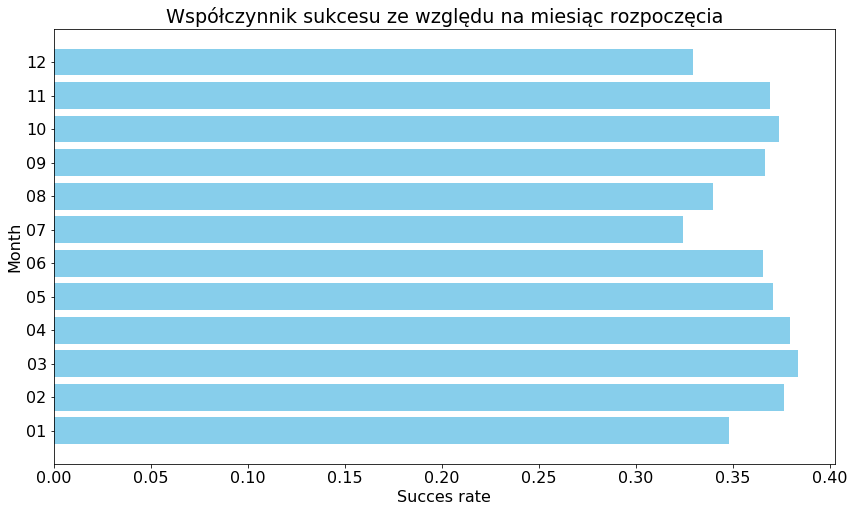

In [17]:
#grupujemy wartości na podstawie launched_month
currency_state=DF.groupby('launched_month')['state'].value_counts().unstack().fillna(0)

succes_rate={}
good=0
bad=0
unique_currency=currency_state.index

#dla każdego kraju wyliczamy succes_rate='successful'/'all'
for currency in unique_currency:
    good=currency_state.at[currency,'successful']
    bad=currency_state.at[currency,'failed']+currency_state.at[currency,'canceled']
    all_results=good+bad
    succes_rate[currency]=good/all_results

#przygotowujemy wartości x,y do pokazania na wykresie
x = list(succes_rate.keys())
y = list(succes_rate.values())

#tworzymy wykres
fig, ax = plt.subplots(figsize=(14, 8))
ax.barh(x, y, color='skyblue')
ax.set_xlabel('Succes rate')
ax.set_ylabel('Month')
ax.set_title('Współczynnik sukcesu ze względu na miesiąc rozpoczęcia')
plt.show()

### Wnioski:

## Miesiąc zakończenia kampanii

In [18]:
DF['deadline_month']=DF['deadline'].str.slice(start=5, stop=7, step=1)

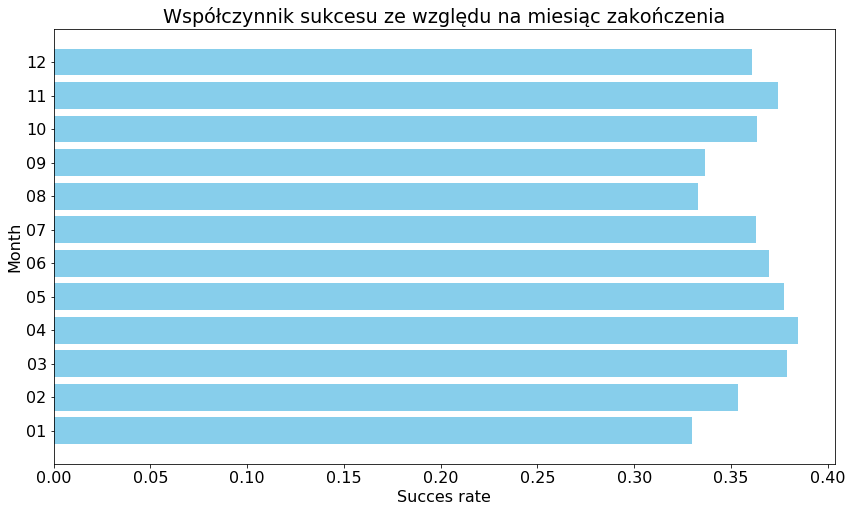

In [19]:
#grupujemy wartości na podstawie deadline_month
currency_state=DF.groupby('deadline_month')['state'].value_counts().unstack().fillna(0)

succes_rate={}
good=0
bad=0
unique_currency=currency_state.index

#dla każdego kraju wyliczamy succes_rate='successful'/'all'
for currency in unique_currency:
    good=currency_state.at[currency,'successful']
    bad=currency_state.at[currency,'failed']+currency_state.at[currency,'canceled']
    all_results=good+bad
    succes_rate[currency]=good/all_results

#przygotowujemy wartości x,y do pokazania na wykresie
x = list(succes_rate.keys())
y = list(succes_rate.values())

#tworzymy wykres
fig, ax = plt.subplots(figsize=(14, 8))
ax.barh(x, y, color='skyblue')
ax.set_xlabel('Succes rate')
ax.set_ylabel('Month')
ax.set_title('Współczynnik sukcesu ze względu na miesiąc zakończenia')
plt.show()

### Wnioski:

## Przykład z Information Value

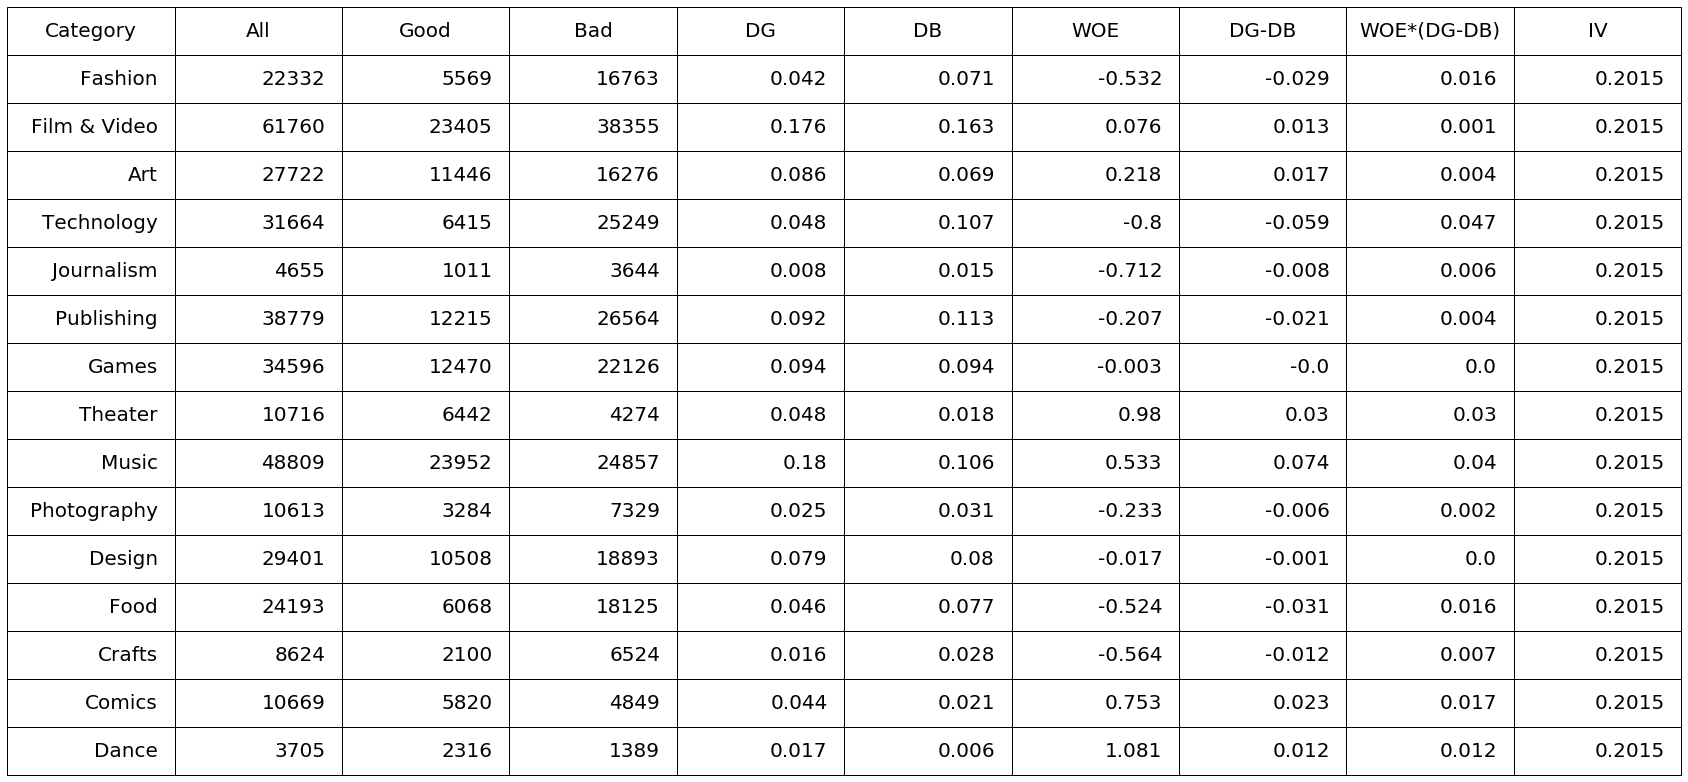

In [86]:
import math

main_category=DF.groupby('main_category')['state'].value_counts().unstack().fillna(0)

# 1.Całkowita liczba respondentów / odpowiedzi w danej grupie
# 2.Liczba odpowiedzi negatywnych
# 3.Liczba odpowiedzi pozytywnych

good_per_category={}
bad_per_category={}
all_per_category={}
for category in main_category_list:
    good_per_category[category]=main_category.at[category,'successful']
    bad_per_category[category]=main_category.at[category,'failed']+main_category.at[category,'canceled']
    all_per_category[category]=good_per_category[category]+bad_per_category[category]

all_bad=sum(bad_per_category.values())    
all_good=sum(good_per_category.values())

# 4.DB (distribution bad)= % odpowiedzi negatywnych (z wszystkich negatywnych)
# 5.DG (distribution good)= % odpowiedzi pozytywnych (z wszystkich pozytywnych)

distribution_good={}
distribution_bad={}
for category in main_category_list:
    distribution_good[category]=good_per_category[category]/all_good
    distribution_bad[category]=bad_per_category[category]/all_bad

# 6. WOE (weight of evidence) = logarytm naturalny z ilorazu DG/DB
# 7. Różnica między dystrybucjami: DG - DB
# 8. Wartość dla jednej grupy: (DG - DB) * WOE
# 9. IV (information value) = suma wartości punktu 8 dla wszystkich grup

WOE={}
DG_minus_DB={}
result={}
for category in main_category_list:
    WOE[category]=math.log(distribution_good[category]/distribution_bad[category])
    DG_minus_DB[category]=distribution_good[category]-distribution_bad[category]
    result[category]=WOE[category]*DG_minus_DB[category]

Information_Value=sum(result.values())

inforamtion_value_table=[]
for category in main_category_list:
    inforamtion_value_table.append([
            category, 
          all_per_category[category],
          good_per_category[category],
          bad_per_category[category],
          round(distribution_good[category],3),
          round(distribution_bad[category],3),
          round(WOE[category],3),
          round(DG_minus_DB[category],3),
          round(result[category],3),
          round(Information_Value,4)])


#wyświetlanie tabeli
fig, ax = plt.subplots()

fig.patch.set_visible(False)
ax.axis('off')

df = pd.DataFrame(inforamtion_value_table, 
columns=['Category', 'All', 'Good', 'Bad', 'DG','DB','WOE','DG-DB','WOE*(DG-DB)','IV'])

the_table=ax.table(cellText=df.values, colLabels=df.columns, loc='center')
the_table.auto_set_font_size(False)
the_table.set_fontsize(20)
the_table.scale(5,4)


plt.show()



## Przykład z korelacją

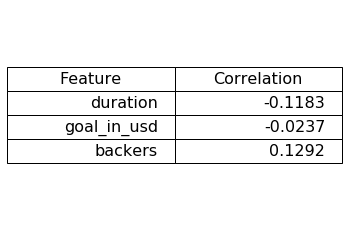

In [107]:
# wniosek byłby z tego taki, że korelacje o wartości wyższej niż 0,1 
# są albo z oczywistością (typu im więcej zebrali pieniędzy, 
# tym większe prawdopodobieństwo sukcesu), albo z duration - co potwierdzałoby 
# ruch kickstartera, żeby skrócić "okno transferowe".
# drugi wniosek, że z powodu właśnie tak niskich korelacji, 
# zasadnym było iść w stronę poszukiwania kampanii podobnych i na tej 
# podstawie wyliczać współczynnik sukcesu jako % sukcesów w zbiorze 
# niż np. szukać ogólnego wzoru na sukces biorącego pod uwagę różne wagi różnych parametrów kampanii.
#~Paweł Alicki

# nadanie wartości liczbowych statusowi kampanii, żeby móc policzyć korelację: sukces = 1, porażka = 0
DF.loc[DF['state'] == 'successful', 'state'] = 1
DF.loc[DF['state'] == 'canceled', 'state'] = 0
DF.loc[DF['state'] == 'failed', 'state'] = 0

# sprawdzenie korelacji
correlation=DF.corrwith(DF['state'])
relevant_correlation=[['duration',round(correlation['duration'],4)],
                     ['goal_in_usd',round(correlation['goal_in_usd'],4)],
                     ['backers',round(correlation['backers'],4)]]


#wyświetlanie tabeli
fig, ax = plt.subplots()

fig.patch.set_visible(False)
ax.axis('off')

df = pd.DataFrame(relevant_correlation, columns=['Feature', 'Correlation'])

the_table=ax.table(cellText=df.values, colLabels=df.columns, loc='center')
the_table.auto_set_font_size(False)
the_table.set_fontsize(16)
the_table.scale(1,2)


plt.show()